In [1]:
import numpy as np
import scipy as sp
from scipy.signal import resample
from matplotlib import pyplot as plt
from scipy import signal

# from tqdm import tqdm

from pyfield import tissue, util


center_frequency = 7e6
bandwidth = center_frequency * 0.8
sample_frequency = 200e6
sound_speed = 1500.
attenuation = 0
density = 1000.
frequency_attenuation = 0.
attenuation_center_frequency = center_frequency
use_attenuation = 1

fc = 7e6
bw = fc * 0.8
fs = 200e6
rho = 1000
c = 1500
area = 35e-6 * 35e-6 * 4

# phantom paramters
ns = 5 * 1000**3  # scatterer density
# blood_att = 0.14 * 100 # 0.14 Np/cm which is about 1.25 dB/cm
# heart_att = 0.58 * 100 # 0.58 Np/cm which is about 5 dB/cm
blood_att = 0.14 * (5.6**1.21) / 8.6886 * 100  # in Np/m
myo_att = 0.52 * (5.6**1) / 8.6886 * 100  # in Np/m
dim = 0.01, 0.01, 0.15

# excitation parameters
path_to_excitation_file = 'd:/Projects/pyfield/examples/data_2x2_nonlinear_sim.npz'
data = np.load(path_to_excitation_file)

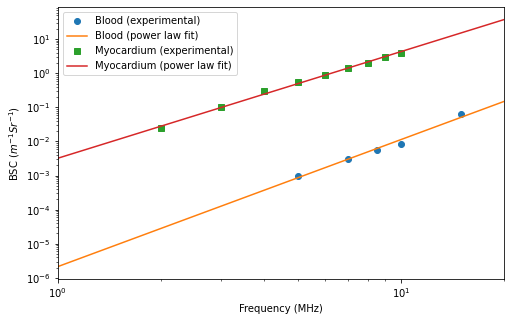

In [108]:
from scipy import signal



blood_bsc = tissue.bsc_human_blood_powerfit(freqs=np.arange(0, 20.5e6, 1e6))
myo_bsc = tissue.bsc_canine_myocardium_powerfit(freqs=np.arange(0, 20.5e6, 1e6))

plt.figure(figsize=(8, 5))
x, y = tissue.bsc_human_blood()
plt.loglog(x / 1e6, y, 'o', label='Blood (experimental)')
plt.loglog(blood_bsc[0] / 1e6, blood_bsc[1], label='Blood (power law fit)')
x, y = tissue.bsc_canine_myocardium()
plt.loglog(x / 1e6, y, 's', label='Myocardium (experimental)')
plt.loglog(myo_bsc[0] / 1e6, myo_bsc[1], label='Myocardium (power law fit)')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel(r'BSC ($m^{-1} Sr^{-1}$)')
plt.xlim(1, 20);



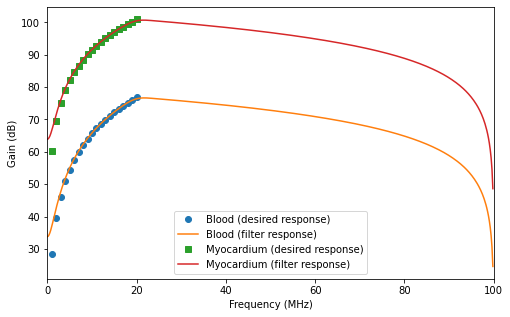

In [102]:
blood_fir = tissue.bsc_to_fir(*blood_bsc, area, ns, fs)
myo_fir = tissue.bsc_to_fir(*myo_bsc, area, ns, fs)

blood_w, blood_h = signal.freqz(blood_fir, fs=fs)
myo_w, myo_h = signal.freqz(myo_fir, fs=fs)

plt.figure(figsize=(8, 5))
y = 20 * np.log10(np.sqrt(blood_bsc[1][1:]) * 2 * np.pi / (area * np.sqrt(ns)))
plt.plot(blood_bsc[0][1:] / 1e6, y, 'o', label='Blood (desired response)')
plt.plot(blood_w  / 1e6, 20 * np.log10(np.abs(blood_h)), label='Blood (filter response)')
y = 20 * np.log10(np.sqrt(myo_bsc[1][1:]) * 2 * np.pi / (area * np.sqrt(ns)))
plt.plot(myo_bsc[0][1:] / 1e6, y, 's', label='Myocardium (desired response)')
plt.plot(myo_w  / 1e6, 20 * np.log10(np.abs(myo_h)), label='Myocardium (filter response)')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Gain (dB)')
plt.xlim(0, 100);

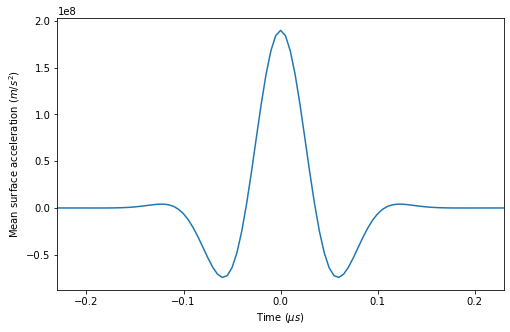

In [113]:
acc, acc_t = util.gausspulse(fc, bw / fc, fs)
acc = acc * 190e6

plt.figure(figsize=(8, 5))
plt.plot(acc_t / 1e-6, acc)
plt.xlabel(r'Time ($\mu s$)')
plt.ylabel(r'Mean surface acceleration ($m / s^2$)')
plt.xlim(acc_t.min() / 1e-6, acc_t.max() / 1e-6);

In [ ]:
phantom = tissue.cardiac_penetration_phantom(dim, blood_att, myo_att, ns)

